<a href="https://colab.research.google.com/github/yangchangnaihoby/AI_7th/blob/master/Project_003_dacon_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from numpy import dot, mean
from numpy.linalg import norm

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import f1_score, roc_auc_score

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Project_003/train.csv')
val = pd.read_csv('/content/drive/MyDrive/Project_003/val.csv')
test = pd.read_csv('/content/drive/MyDrive/Project_003/test.csv')
m93 = pd.read_csv('/content/drive/MyDrive/Project_003/Robust4_to_svm_classification.csv')

In [3]:
columns = []

for i in range(1, 30 + 1) :
  columns.append('V{}'.format(i))

print(columns)

['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30']


In [4]:
val_abnor = val[val['Class'] == 1][columns]
abnor_vector = val_abnor.mean().to_numpy()

def cos_sim(a, b) :
  return dot(a, b) / (norm(a) * norm(b))

def cosfeature(data) :
  datacs = []
  for i in data[columns].to_numpy() :
    datacs.append(cos_sim(abnor_vector, i))
  data['V31'] = datacs

cosfeature(train)
cosfeature(val)
cosfeature(test)

In [5]:
def pearson_similarity(a, b) :
  return dot((a - mean(a)), (b - mean(b))) / ((norm(a - mean(a))) * (norm(b - mean(b))))

def pearsonfeature(data) :
  datacs = []
  for i in data[columns].to_numpy() :
    datacs.append(pearson_similarity(abnor_vector, i))
  data['V32'] = datacs

pearsonfeature(train)
pearsonfeature(val)
pearsonfeature(test)

In [6]:
print(train.columns)
print(len(train.columns))

Index(['ID', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30',
       'V31', 'V32'],
      dtype='object')
33


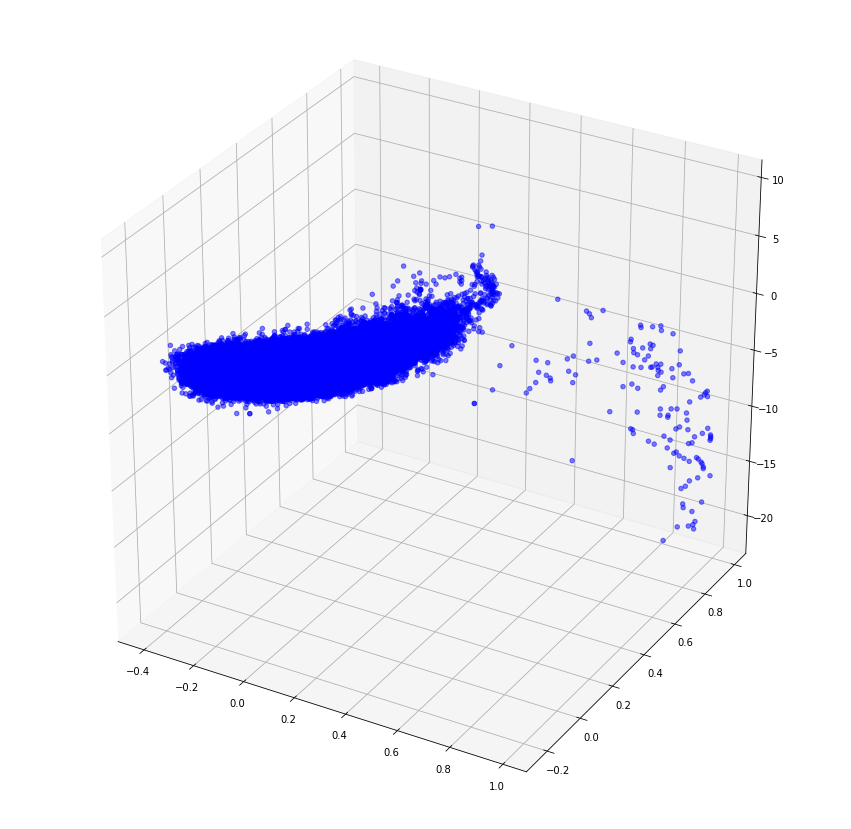

In [7]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
ax.scatter(train['V32'], train['V31'], train['V17'], alpha = 0.5, c = 'b')
plt.show()

In [8]:
fit_columns = ['V17', 'V31', 'V32']

In [9]:
train_x = train[fit_columns]
val_x = val[fit_columns]
test_x = test[fit_columns]

val_y = val['Class']

train_x.head()

,V17,V31,V32
0,1.109969,-0.026012,0.024835
1,-0.684093,-0.090965,-0.136051
2,-0.058133,-0.045050,0.001014
3,-1.222127,-0.108131,-0.144766
4,-0.499768,-0.059377,0.015230


In [10]:
ss = StandardScaler()

train_ss = ss.fit_transform(train_x)
val_ss = ss.fit_transform(val_x)
test_ss = ss.fit_transform(test_x)

train_pd = pd.DataFrame(train_ss)
train_pd.columns = fit_columns
train_pd.head()

,V17,V31,V32
0,1.368591,-0.057081,0.214476
1,-0.850277,-0.719418,-1.023211
2,-0.076100,-0.251215,0.031223
3,-1.515709,-0.894453,-1.090256
4,-0.622307,-0.397306,0.140587


In [11]:
train_x_1 = train_pd.iloc[0 : 25000 + 1]
train_x_2 = train_pd.iloc[25001 : 50000 + 1]
train_x_3 = train_pd.iloc[50001 : 75000 + 1]
train_x_4 = train_pd.iloc[75001 : 100000 + 1]
train_x_5 = train_pd.iloc[100001 : ]

In [12]:
model = DBSCAN(eps = 3.5, min_samples = 200)

In [13]:
predict_1 = pd.DataFrame(model.fit_predict(train_x_1))
predict_1.columns = ['predict']
predict_1[predict_1['predict'] == -1].count()

predict    53
dtype: int64

In [14]:
predict_2 = pd.DataFrame(model.fit_predict(train_x_2))
predict_2.columns = ['predict']
predict_2[predict_2['predict'] == -1].count()

predict    22
dtype: int64

In [15]:
predict_3 = pd.DataFrame(model.fit_predict(train_x_3))
predict_3.columns = ['predict']
predict_3[predict_3['predict'] == -1].count()

predict    29
dtype: int64

In [16]:
predict_4 = pd.DataFrame(model.fit_predict(train_x_4))
predict_4.columns = ['predict']
predict_4[predict_4['predict'] == -1].count()

predict    22
dtype: int64

In [17]:
predict_5 = pd.DataFrame(model.fit_predict(train_x_5))
predict_5.columns = ['predict']
predict_5[predict_5['predict'] == -1].count()

predict    7
dtype: int64

In [18]:
total_predict = pd.concat([predict_1, predict_2, predict_3, predict_4, predict_5], ignore_index = True)
total_predict.head()

,predict
0,0
1,0
2,0
3,0
4,0


In [19]:
result = []
result_color = []

for i in range(len(total_predict)) :
  if total_predict['predict'][i] == -1 :
    result.append(1)
    result_color.append('r')
  else :
    result.append(0)
    result_color.append('b')

print(len(result_color))
print(len(train))
print(result_color.count('r'))

113842
113842
133


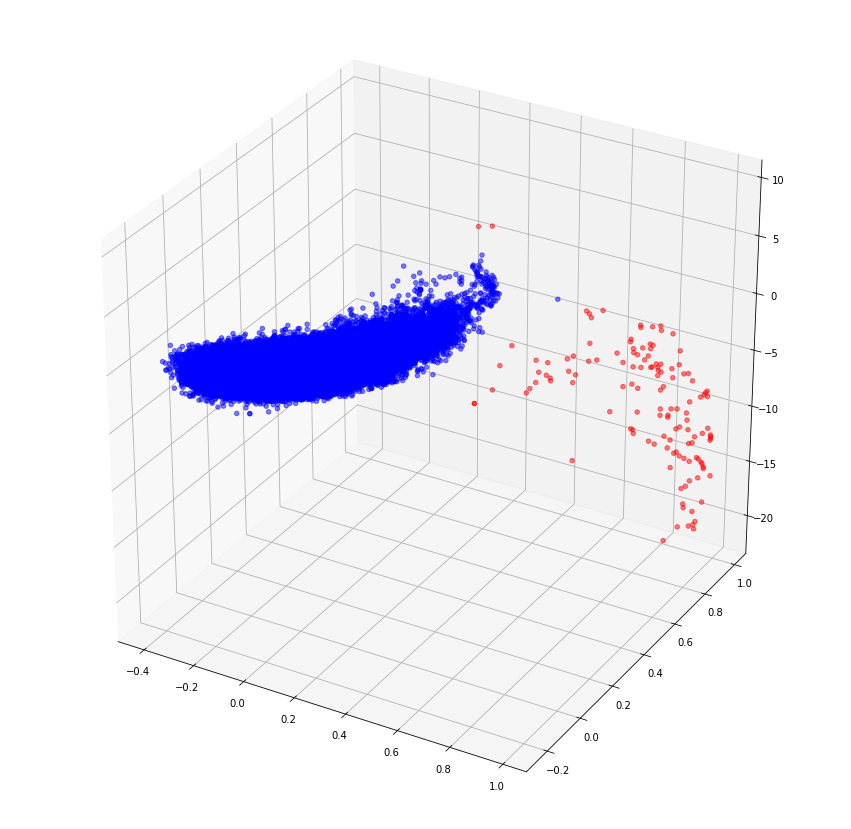

In [20]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
ax.scatter(train['V32'], train['V31'], train['V17'], alpha = 0.5, c = result_color)
plt.show()

In [21]:
train_pd.head()

,V17,V31,V32
0,1.368591,-0.057081,0.214476
1,-0.850277,-0.719418,-1.023211
2,-0.076100,-0.251215,0.031223
3,-1.515709,-0.894453,-1.090256
4,-0.622307,-0.397306,0.140587


In [22]:
train_arr = train_pd.to_numpy()
target_arr = result

In [181]:
svm = SVC(C = 0.3)
svm.fit(train_arr, target_arr)

SVC(C=0.3)

In [182]:
predict_train = svm.predict(train_pd)
predict_train[ : 5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 0, 0, 0])

In [183]:
color_svm = []

for i in range(len(predict_train)) :
  if predict_train[i] == 1 :
    color_svm.append('r')
  else :
    color_svm.append('b')

color_svm.count('r')

133

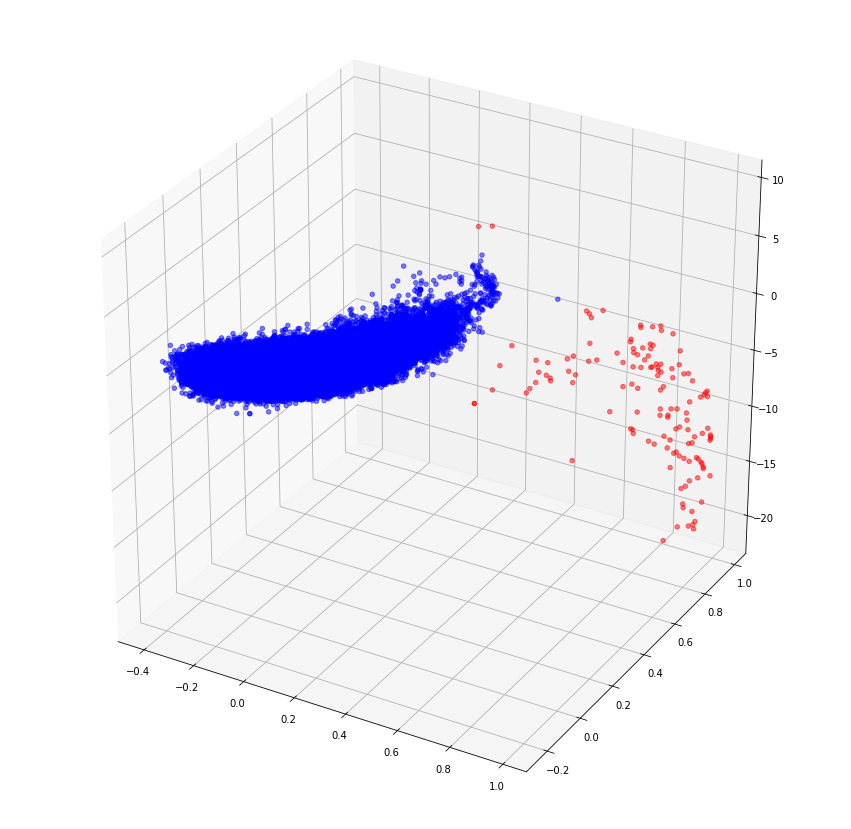

In [184]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
ax.scatter(train['V32'], train['V31'], train['V17'], alpha = 0.5, c = color_svm)
plt.show()

In [185]:
test_pd = pd.DataFrame(test_ss)
test_pd.columns = fit_columns
test_pd.head()

,V17,V31,V32
0,0.239551,-0.326526,0.130514
1,-0.124839,-0.355793,0.253901
2,-0.262826,-0.525541,0.260924
3,0.007951,-0.717866,-1.173589
4,-0.909640,-0.639061,0.131745


In [186]:
predict_test = svm.predict(test_pd)
predict_test[ : 5]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but SVC was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 0, 0, 0])

In [187]:
color_test = []

for i in range(len(predict_test)) :
  if predict_test[i] == 1 :
    color_test.append('r')
  else :
    color_test.append('b')

color_test.count('r')

313

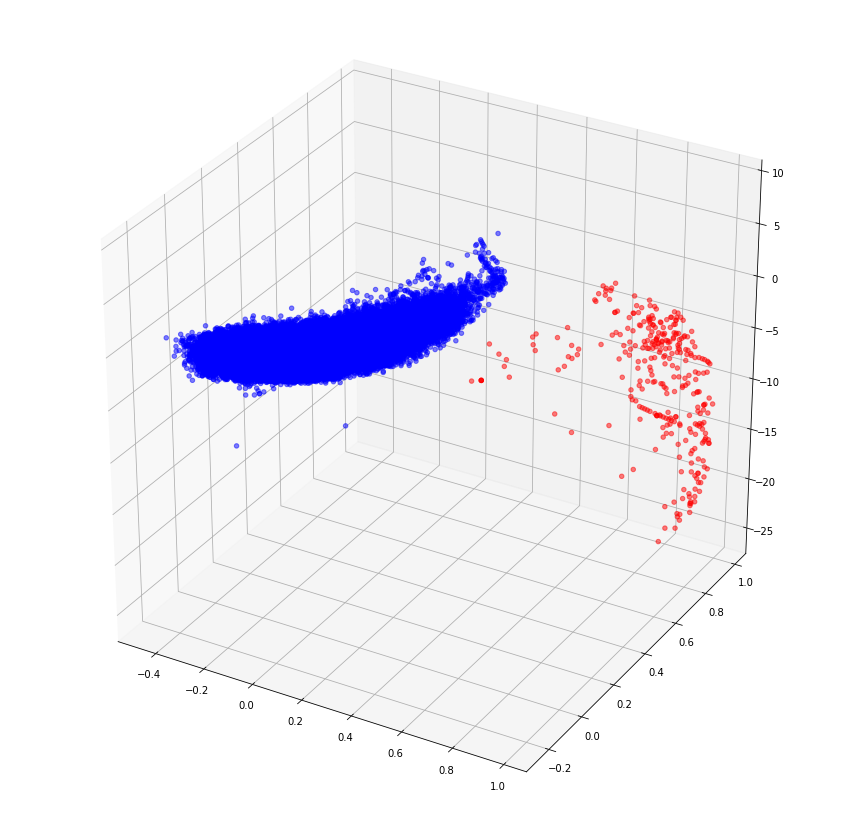

In [188]:
fig = plt.figure(figsize = (15, 15))
ax = fig.add_subplot(projection = '3d')
ax.scatter(test['V32'], test['V31'], test['V17'], alpha = 0.5, c = color_test)
plt.show()

In [189]:
predict_pd = pd.DataFrame(predict_test)
answer = pd.concat([test['ID'], predict_pd], axis = 1)
answer.columns = ['ID', 'Class']
answer.set_index('ID', inplace = True)
answer.head()

,Class
ID,
AAAA0x1,0
AAAA0x2,0
AAAA0x5,0
AAAA0x7,0
AAAA0xc,0


In [190]:
answer[answer['Class'] == 1].count()

Class    313
dtype: int64

In [191]:
result_m93 = m93['Class'].to_numpy()

color_m93 = []

for i in range(len(result_m93)) :
  if result_m93[i] == 1 :
    color_m93.append('r')
  else :
    color_m93.append('b')

color_m93.count('r')

314

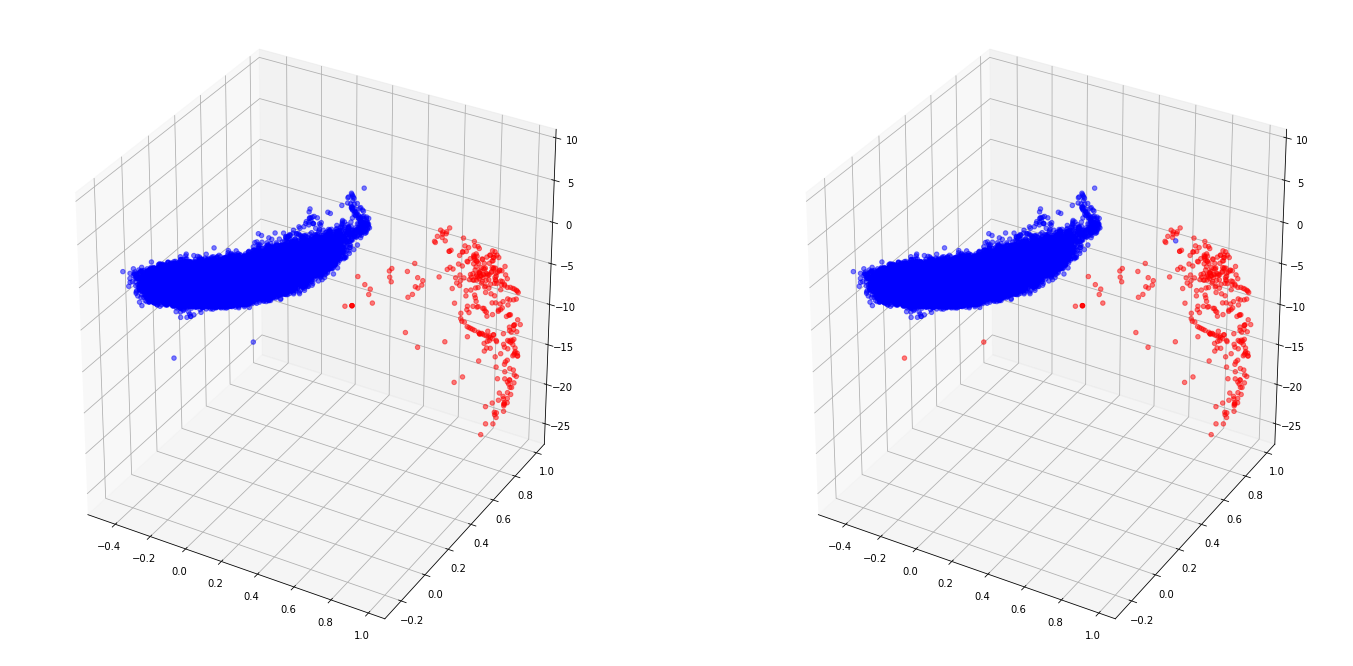

In [192]:
fig = plt.figure(figsize = (24, 12))

ax1 = fig.add_subplot(121, projection = '3d')
ax1.scatter(test['V32'], test['V31'], test['V17'], alpha = 0.5, c = color_test)

ax2 = fig.add_subplot(122, projection = '3d')
ax2.scatter(test['V32'], test['V31'], test['V17'], alpha = 0.5, c = color_m93)

plt.show()